In [124]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, log_loss, roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.externals import joblib
import numpy as np

## CAR

In [29]:
url = ('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter06/Dataset/car.data')
headers = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'car']
df = pd.read_csv(url, names=headers, index_col=None)
df.head()

,buying,maint,doors,persons,lug_boot,safety,car
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [30]:
df = pd.get_dummies(df, columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
df.head()

,car,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,1,0
1,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,1
2,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,1,0,0
3,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
4,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,0,1


In [31]:
X = df.drop('car', 1).values
y = df.car.values

In [33]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.3, random_state=0)

In [34]:
X_test, X_val, y_test, y_val = train_test_split(X_eval, y_eval, test_size=0.5, random_state=0)

In [35]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
preds = model.predict(X_val)
preds

array(['acc', 'acc', 'good', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc',
       'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'good', 'acc', 'acc', 'acc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'acc', 'good', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'unacc',
       'acc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'good', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc

In [38]:
confusion_matrix(preds, y_val)

array([[ 54,   6,  10,   1],
       [  3,   6,   0,   0],
       [  6,   0, 168,   0],
       [  1,   3,   0,   2]], dtype=int64)

In [50]:
print('Precision: ', precision_score(y_val, preds, average='macro'))
print('Recall: ', recall_score(y_val, preds, average='macro'))
print('F1: ', f1_score(y_val, preds, average='macro'))
print('Accuracy: ', accuracy_score(preds, y_val))
print('Log loss: ', log_loss(y_val, model.predict_proba(X_val)))

Precision:  0.6815201554152501
Recall:  0.7135592228464419
F1:  0.6747474747474747
Accuracy:  0.8846153846153846
Log loss:  0.23237452178350346


## TOXIC

In [5]:
url_2 = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter06/Dataset/qsar_fish_toxicity.csv'
headers_2 = ['CIC0', 'SM1', 'GATS1i', 'NdsCH', 'Ndssc', 'MLOGP', 'response']
df_2 = pd.read_csv(url_2, names= headers_2, sep=';')
df_2.head()

,CIC0,SM1,GATS1i,NdsCH,Ndssc,MLOGP,response
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


In [8]:
X = df_2.drop('response', 1)
y = df_2.response

In [10]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_eval, y_eval, random_state=0)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
y_pred = model.predict(X_val)

In [47]:
model.score(X_val, y_val)

0.5623861754188693

## MAE

In [8]:
headers = ['CIC0', 'SM1', 'GATS1i', 'NdsCH', 'Ndssc', 'MLOGP', 'response']
df = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter06/Dataset/qsar_fish_toxicity.csv', 
                 names=headers, sep=';')
df.head()

,CIC0,SM1,GATS1i,NdsCH,Ndssc,MLOGP,response
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


In [9]:
X = df.drop('response', 1)
y = df.response

In [10]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_eval, y_eval, random_state=42)

In [18]:
steps=[
    ('scaler', MinMaxScaler()),
    ('poly', PolynomialFeatures(2)),
    ('model', LinearRegression())
]

In [19]:
model = Pipeline(steps)

In [20]:
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [21]:
preds = model.predict(X_val)

In [22]:
print('MAE: ', mean_absolute_error(y_val, preds))
print('R2: ', model.score(X_val, y_val))

MAE:  0.6933747775820572
R2:  0.500465763083789


## ROC

In [51]:
URL = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter06/Dataset/caesarian.csv.arff'
headers = ['Age', 'Delivery_Nbr', 'Delivery_Time', 'Blood_Pressure', 'Heart_Problem', 'Caesarian']
df = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter06/Dataset/caesarian.csv.arff', 
                 names=headers, index_col=None, skiprows=15)
df.head()

,Age,Delivery_Nbr,Delivery_Time,Blood_Pressure,Heart_Problem,Caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


In [58]:
X = df.drop('Caesarian', 1)
y = df.Caesarian

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_eval, y_eval, test_size=0.5, random_state=0)

In [59]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
preds_proba = model.predict_proba(X_val)
preds_proba

array([[0.32085037, 0.67914963],
       [0.44452429, 0.55547571],
       [0.55005086, 0.44994914],
       [0.19657847, 0.80342153],
       [0.55519917, 0.44480083],
       [0.22083119, 0.77916881],
       [0.32614894, 0.67385106],
       [0.48008433, 0.51991567]])

In [65]:
FP, TP, TS = roc_curve(y_val, preds_proba[:, 0])

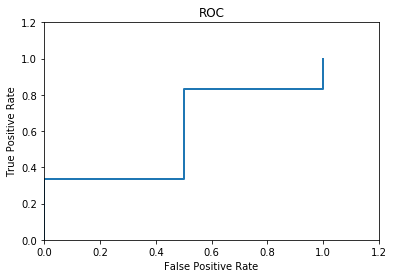

In [67]:
plt.plot(FP, TP, lw=2, label='ROC')
plt.xlim(0.0, 1.2)
plt.ylim(0.0, 1.2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [69]:
print(roc_auc_score(y_val, preds_proba[:, 0]))

0.5833333333333334


## SAVE MODEL

In [70]:
headers = ['CIC0', 'SM1', 'GATS1i', 'NdsCH', 'Ndssc', 'MLOGP', 'response']

# read in data
df = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter06/Dataset/qsar_fish_toxicity.csv', 
                 names=headers, sep=';')
df.head()

,CIC0,SM1,GATS1i,NdsCH,Ndssc,MLOGP,response
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


In [71]:
X = df.drop('response', 1)
y = df.response

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_eval, y_eval, random_state=0)

In [72]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
preds = model.predict(X_val)

In [76]:
joblib.dump(model, './model.joblib')

['./model.joblib']

In [77]:
m2 = joblib.load('./model.joblib')

In [78]:
m2_preds = m2.predict(X_val)

In [80]:
ys = pd.DataFrame(dict(predicted=preds, m2=m2_preds))
ys.head()

,predicted,m2
0,4.155885,4.155885
1,6.398238,6.398238
2,5.183181,5.183181
3,3.771333,3.771333
4,4.593059,4.593059


## ATIVIDADE

In [102]:
file_url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter03/bank-full.csv'
data = pd.read_csv(file_url, sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [103]:
cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
data = pd.get_dummies(data, columns=cat)
data.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,no,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1


In [110]:
X = data.drop('y', 1)
y = data.y

In [111]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_eval, y_eval, random_state=0)

In [122]:
model_1 = LogisticRegression(max_iter=2000)
model_1.fit(X_train, y_train)
preds_1 = model_1.predict(X_val)
model_1_report = classification_report(y_val, preds_1)
print(model_1_report)

              precision    recall  f1-score   support

          no       0.92      0.97      0.95      6004
         yes       0.63      0.35      0.45       778

    accuracy                           0.90      6782
   macro avg       0.78      0.66      0.70      6782
weighted avg       0.89      0.90      0.89      6782



In [120]:
model_2 = DecisionTreeClassifier(max_depth=6)
model_2.fit(X_train, y_train)
preds_2 = model_2.predict(X_val)
model_2_report = classification_report(y_val, preds_2)
print(model_2_report)

              precision    recall  f1-score   support

          no       0.93      0.96      0.94      6004
         yes       0.58      0.41      0.48       778

    accuracy                           0.90      6782
   macro avg       0.76      0.68      0.71      6782
weighted avg       0.89      0.90      0.89      6782



In [131]:
model_3 = RandomForestClassifier(n_estimators=100)
model_3.fit(X_train, y_train)
preds_3 = model_3.predict(X_val)
model_3_report = classification_report(y_val, preds_3)
print(model_3_report)

              precision    recall  f1-score   support

          no       0.93      0.97      0.95      6004
         yes       0.63      0.42      0.50       778

    accuracy                           0.90      6782
   macro avg       0.78      0.69      0.73      6782
weighted avg       0.89      0.90      0.90      6782



In [133]:
score_1 = model_1.score(X_val, y_val)
score_2 = model_2.score(X_val, y_val)
score_3 = model_3.score(X_val, y_val)
print('Linear Score: {}, \nDecision Score: {}, \nRandomForest Score: {}'.format(score_1, score_2, score_3))

Linear Score: 0.9020937776467118, 
Decision Score: 0.8987024476555588, 
RandomForest Score: 0.9047478619876143
